<a href="https://colab.research.google.com/github/asafdari-boop/ComputationalPhyiscsLibrary/blob/main/ODE1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Euler's method and the Runge-Kutta method for one variable

**Euler's method**

$x(t + h) = x(t) + h \times f[x, t]$

**2nd Runge-Kutta method**

$x(t+h)=x(t) = h \times f[x(t+h/2), t+h/2]$

which means we need to calculate $x(t+h/2)$ and we can use Euler's method $x(t+h/2)=x(t)+h/2 \times f(x, t)$

so we have:

$k_1 = h \times f(x, t)$

$k_2 = h \times f[x+k_1/2, t+h/2]$

then we have $x(t+h) = x(t) + k_2$.

**4-th order Runge-Kutta method**

$k_1 = h \times f(x,t)$

$k_2 = h \times f[x+k_1/2, t+h/2]$

$k_3 = h \times f[x+k_2/2, t+h/2]$

$k_4 = h \times f[x+k_3, t+h]$

then we have $x(t+h) = x(t) + (k_1+2k_2+2k_3+k_4)/6$.

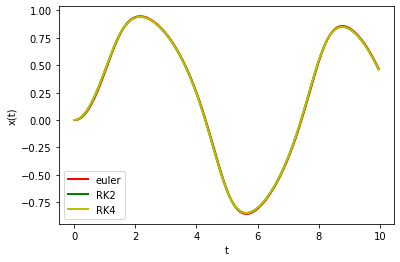

In [ ]:
import numpy as np
import matplotlib.pylab as plt

def func(x, t):
    return -x**3 + np.sin(t)

a = 0
b = 10
N = 200
h = (b-a)/N

tpoints = np.arange(a, b, h)

# Euler's method
x = 0. # initial value
xpoints_Euler = []
for t in tpoints:
  xpoints_Euler.append(x)
  f = func(x, t)
  x += h*f

# RK2 method
x = 0. # initial value
xpoints_RK2 = []
for t in tpoints:
  xpoints_RK2.append(x)
  k1 = h*func(x, t)
  k2 = h*func(x+0.5*k1, t+0.5*h)
  x += k2

# RK4 method
x = 0. # initial value
xpoints_RK4 = []
for t in tpoints:
  xpoints_RK4.append(x)
  k1 = h*func(x, t)
  k2 = h*func(x+0.5*k1, t+0.5*h)
  k3 = h*func(x+0.5*k2, t+0.5*h)
  k4 = h*func(x+k3, t+h)
  x += (k1+2*k2+2*k3+k4)/6

plt.figure()
plt.plot(tpoints, xpoints_Euler, 'r-', linewidth=2.0)
plt.plot(tpoints, xpoints_RK2, 'g-', linewidth=2.0)
plt.plot(tpoints, xpoints_RK4, 'y-', linewidth=2.0)
plt.legend(['euler', 'RK2', 'RK4'], loc='best')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.show()

# The 4-th order Runge-Kutta method for two variables

We have two simultaneous diffeential equations equations with only one independent variable $t$:

$\frac{dx}{dt} = xy-x$

$\frac{dy}{dt} = y-xy+\sin^2 \omega t$

The initial condition is $x=y=1$ at $t=0$ for the case $\omega=1$

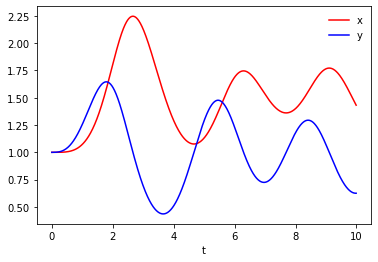

In [ ]:
from math import sin
from numpy import array, arange
import matplotlib.pyplot as plt

# use a vector r to represent all variables (x, y, z, ...)
# use f(r, t) to indicate the first-order derivatives (dx/dt, dy/dt, dz/dt, ...)
def f(r,t):
    x = r[0]
    y = r[1]
    fx = x*y - x
    fy = y - x*y + sin(t)**2
    return array([fx, fy], float)

a = 0.0
b = 10.0
N = 1000
h = (b-a)/N

tpoints = arange(a, b, h)
xpoints = []
ypoints = []

# initialize the r vector
r = array([1.0, 1.0], float)
for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6
    
plt.plot(tpoints,xpoints,"r")
plt.plot(tpoints,ypoints,"b-")
plt.legend(['x', 'y'], loc='best', frameon=False)
plt.xlabel("t")
plt.show()

## Nonlinear pendulum with RK4

$\frac{d^2 \theta}{dt^2} = -\frac{g}{L} \sin \theta$

We can have two 1st order equations for $\theta$ and $\omega$: 

$\frac{d \theta}{dt} = \omega$ 

$\frac{d \omega}{dt} = -\frac{g}{L} \sin \theta$

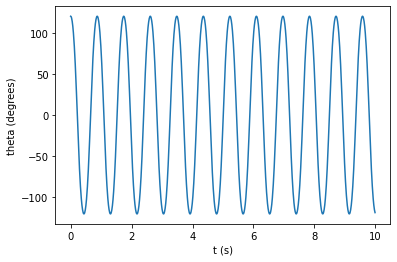

In [ ]:
# nonlinear pendulum
from numpy import array, arange, pi, sin, cos
import matplotlib.pyplot as plt

g, L = 9.81, 0.1
theta_0, omega_0 = 120*pi/180, 0.   # initial position and initial velocity

t_0, t_max = 0.0, 10.0
N = 1000
h = (t_max-t_0)/N

# define the two differential equations
def f(r, t):
    theta = r[0]
    omega = r[1]
    ftheta = omega
    fomega = - (g / L) * sin(theta)
    return array([ftheta, fomega], float)

# Using fourth-order Runge-Kutta
tpoints = arange(t_0, t_max, h)
thetapoints = []
omegapoints = []
r = array([theta_0, omega_0], float)

for t in tpoints:
    thetapoints.append(r[0])
    omegapoints.append(r[1])
    k1 = h*f(r, t)
    k2 = h*f(r+0.5*k1, t+0.5*h)
    k3 = h*f(r+0.5*k2, t+0.5*h)
    k4 = h*f(r+k3, t+h)
    r += (k1+2*k2+2*k3+k4)/6

# Plot theta vs t
plt.plot(tpoints, (array(thetapoints, float) * 180 / pi))
plt.xlabel('t (s)')
plt.ylabel('theta (degrees)')
plt.show()

# Lorenz equations with RK4 for three variables

wikipedia https://en.wikipedia.org/wiki/Lorenz_system

It is notable for having chaotic solutions for certain parameter values and initial conditions. 

$\frac{dx}{dt} = \sigma(y-x)$

$\frac{dy}{dt} = x(\rho-z)-y$

$\frac{dz}{dt} = xy-\beta z$


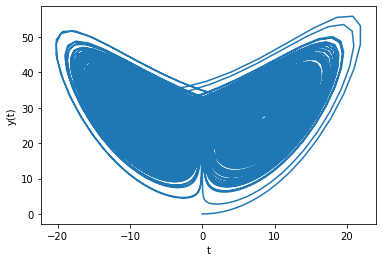

In [ ]:
from numpy import array, arange
from pylab import plot, show, xlabel, ylabel

# Constants
sigma = 10
rho = 28
beta = 8 / 3

t_0 = 0
t_f = 50

# initial values
x_0 = 0
y_0 = 1
z_0 = 0

N = 20000
h = (t_f - t_0) / N

def f_x(x, y, z, t):
    return sigma * (y - x)

def f_y(x, y, z, t):
    return rho * x - y - x * z

def f_z(x, y, z, t):
    return x * y- beta * z

# define three differential equations
def f(r, t):
    x = r[0]
    y = r[1]
    z = r[2]
    return array([f_x(x, y, z, t), f_y(x, y, z, t), f_z(x, y, z, t)], float)

tpoints = arange(t_0, t_f, h)
xpoints = []
ypoints = []
zpoints = []
R = array([x_0, y_0, z_0], float)   # group variables together

# RK4 method
for t in tpoints:
    xpoints.append(R[0])
    ypoints.append(R[1])
    zpoints.append(R[2])
    k1 = h*f(R, t)
    k2 = h*f(R+0.5*k1, t+0.5*h)
    k3 = h*f(R+0.5*k2, t+0.5*h)
    k4 = h*f(R+k3, t+h)
    R += (k1+2*k2+2*k3+k4)

plot(xpoints, zpoints)
show()

# Euler and Runge-Kutta method for any number of variables

Example: falling sphere with constant and varying drag

We have two equations:

$\frac{dz}{dt} = v$

$\frac{dv}{dt} = g-\alpha v^2$

with $\alpha = \frac{3\rho_f}{4\rho_s d} C_D$

For initial conditions $z(0)=0$ and $v(0)=0$, the analytical solution is

$z(t) = \frac{\ln (\cosh(\sqrt{\alpha g}t))}{\alpha}$ and $v(t)=\sqrt{\frac{g}{\alpha}} \tanh(\sqrt{\alpha g}t)$

Consider $d=41$ mm, $\rho_f=1.22$ kg/m$^3$, $\rho_s=1275$ kg/m$^3$, and $C_D=0.4$, we will have $\alpha = 7\times 10^{-3}$.

We substitute $z_0$ for $z$ and $z_1$ for $v$, and the two equations will be 

$\frac{dz_0}{dt} = z_1$

$\frac{dz_1}{dt} = g-\alpha z_1^2$


In [ ]:
# example from https://folk.ntnu.no/leifh/teaching/tkt4140/._main011.html

import numpy as np

# Euler's method
#    z0 is a vector for the initial conditions
def euler(func, r0, time):
    # define arrays of zeros with the number of arrays determined by 
    # the size of r0 and the number of time steps
    r = np.zeros((np.size(time), np.size(r0))) 
    r[0,:] = r0

    for i in range(len(time)-1):
        dt = time[i+1] - time[i]
        r[i+1,:] = r[i,:] + np.asarray(func(r[i,:], time[i]))*dt
        
    return r

# The 2nd-order Runge-Kutta method
#    r0 is a vector for the initial conditions    
def rk2(func, r0, time):
    r = np.zeros((np.size(time), np.size(r0)))
    r[0,:] = r0

    # here we want to know both the index and the actual time for each time step
    # and thus the enumerate function is called
    for i, t in enumerate(time[0:-1]): 
        dt = time[i+1] - time[i]             
        k1 = func(r[i,:], t)               
        k2 = func(r[i,:] + 0.5*k1*dt, t + 0.5*dt) 
        r[i+1,:] = r[i,:] + k2 * dt 

    return r

# The 4th-order Runge-Kutta method
#    r0 is a vector for the initial conditions    
def rk4(func, r0, time):
    r = np.zeros((np.size(time), np.size(r0)))
    r[0,:] = r0

    # here we want to know both the index and the actual time for each time step
    # and thus the enumerate function is called
    for i, t in enumerate(time[0:-1]):
        dt = time[i+1] - time[i]
        dt2 = dt/2.0
        k1 = func(r[i,:], t)          
        k2 = func(r[i,:] + k1*dt2, t + dt2)
        k3 = func(r[i,:] + k2*dt2, t + dt2)
        k4 = func(r[i,:] + k3*dt, t + dt)  
        r[i+1,:] = r[i,:] + dt/6.0*(k1 + 2.0*k2 + 2.0*k3 + k4) 
        
    return r

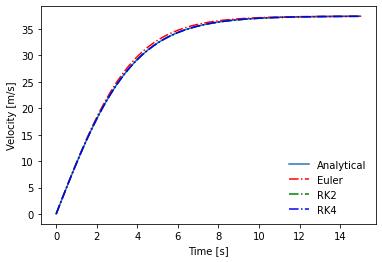

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

g = 9.81      # Gravity m/s^2
d = 41.0e-3   # Diameter of the sphere
rho_f = 1.22  # Density of fluid [kg/m^3]
rho_s = 1275  # Density of sphere [kg/m^3]
nu = 1.5e-5   # Kinematical viscosity [m^2/s]
CD = 0.4      # Constant drag coefficient

"""2x2 system for sphere with constant drag."""
def func(x, t):
    xout = np.zeros(np.size(x))
    alpha = 3.0*rho_f/(4.0*rho_s*d)*CD
    xout[:] = [x[1], g - alpha*x[1]**2]
    return xout 

T = 15  # end of simulation
N = 50

# no of time steps
time = np.linspace(0, T, N+1)
x0 = np.zeros(2)
x0[0] = 2.0

xe = euler(func, x0, time)     # compute response with constant CD using Euler's method
xrk2 = rk2(func, x0, time)     # compute response with constant CD using RK2
xrk4 = rk4(func, x0, time)     # compute response with constant CD using RK4

k1 = np.sqrt(g*4*rho_s*d/(3*rho_f*CD))
k2 = np.sqrt(3*rho_f*g*CD/(4*rho_s*d))
v_a = k1*np.tanh(k2*time)      # compute response with constant CD using analytical solution

# plotting
legends=[]
plt.plot(time, v_a)
legends.append('Analytical')

plt.plot(time, xe[:,1], 'r-.')
legends.append('Euler')

plt.plot(time, xrk2[:,1], 'g-.')
legends.append('RK2')

plt.plot(time, xrk4[:,1], 'b-.')
legends.append('RK4')

plt.legend(legends, loc='best', frameon=False)
plt.xlabel('Time [s]')
plt.ylabel('Velocity [m/s]')
plt.show()

# Adaptive Runge-Kutta method

Cometary orbits:

$\frac{d^2x}{dt^2} = -GM \frac{x}{r^3}$

$\frac{d^2y}{dt^2} = -GM \frac{y}{r^3}$

with $r=\sqrt{x^2+y^2}$.

Let $r_0=x$, $r_1=\frac{dx}{dt}$, $r_2=y$ and $r_3=\frac{dy}{dt}$, so we have four equations:

$\frac{dr_0}{dt} = r_1$

$\frac{dr_1}{dt} = -GM \frac{r_0}{r^3}$

$\frac{dr_2}{dt} = r_3$

$\frac{dr_3}{dt} = -GM \frac{r_2}{r^3}$

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: RuntimeWarning: divide by zero encountered in double_scalars


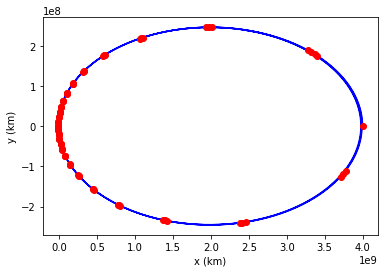

In [ ]:
from numpy import array, arange, sqrt, power
import matplotlib.pyplot as plt

# Constants
m_sun = 1.989 * 10 ** 30  # kg
G = 66374.2  # in m^3/ kg*yr^2
x_0 = 4 * 10 ** 12  # m
y_0 = 0
v_x = 0
v_y = 15768000000  # m/year
t_0 = 0
t_f = 165  # years

N = 200000
h = (t_f - t_0) / N

# these are the four differential equations listed above
def f(r, t):
    x = r[0]
    vx = r[1]
    y = r[2]
    vy = r[3]
    dist = sqrt(x**2 + y**2)
    return array([vx, - G*m_sun*x/dist**3, vy, - G*m_sun*y/dist**3], float)

# RK4 method
# param r: current positions and velocities
# param t: current t
# param h: step size
# return: a vector of the change in positions and velocities to get to t+h        
def runge_kutta_step(r, t, h):        
        k1 = h * f(r, t)
        k2 = h * f(r + 0.5*k1, t + 0.5*h)
        k3 = h * f(r + 0.5*k2, t + 0.5*h)
        k4 = h * f(r + k3, t + h)
        return (k1+2*k2+2*k3+k4)/6

#
# Using a fixed step size for the RK4 method
#
tpoints = arange(t_0, t_f, h)
xpoints = []
ypoints = []
r = array([x_0, v_x, y_0, v_y], float)
for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[2])
    k1 = h * f(r, t)
    k2 = h * f(r + 0.5*k1, t + 0.5*h)
    k3 = h * f(r + 0.5*k2, t + 0.5*h)
    k4 = h * f(r + k3, t + h)
    r += (k1+2*k2+2*k3+k4)/6

#
# Using adaptive step size for the RK4 method
#
def time_step(r, t, h):
    # perform 2 RK steps of step size h
    delta_step_1 = runge_kutta_step(r, t, h)
    delta_step_2 = runge_kutta_step(r + delta_step_1, t + h, h)
    delta_r1 = delta_step_1 + delta_step_2

    # perform 1 RK step with step size 2h
    delta_r2 = runge_kutta_step(r, t, 2 * h)

    # Compute error estimate
    delta_x1 = delta_r1[0]
    delta_x2 = delta_r2[0]
    delta_y1 = delta_r1[2]
    delta_y2 = delta_r2[2]
    error = sqrt((delta_x1 - delta_x2)**2 + (delta_y1 - delta_y2)**2) / 30

    # Calculate rho
    rho = h * delta / error

    # Calculate factor to multiply h by
    factor = power(rho, 1./4)

    # Update h accordingly
    # If target accuracy met, move on to next step
    if  rho >= 1:
        # update t
        t = t + 2 * h

        # Prevent h from getting too large
        if factor > 2:
            h *= 2
        else:
            h *= factor

        # Use local extrapolation to better our estimate of the positions
        delta_r1[0] += (delta_x1 - delta_x2)/15
        delta_r1[2] += (delta_y1 - delta_y2)/15
        return delta_r1, h, t
    # If target accuracy not met, must redo step with smaller h
    else:
        return time_step(r, t, factor * h)

delta = 1000   # target accuracy per unit interval in m/yr
h = (t_f - t_0) / 150000  # initial step size
tpoints = []
xpoints2 = []
ypoints2 = []
r = array([x_0, v_x, y_0, v_y], float)  # initial conditions
t = t_0
while(t < t_f):
    tpoints.append(t)
    xpoints2.append(r[0])
    ypoints2.append(r[2])
    delta_r, h, t = time_step(r, t, h)
    r += delta_r

plt.plot(array(xpoints, float)/1000, array(ypoints, float)/1000, 'b')
plt.plot(array(xpoints2, float)[::20]/1000, array(ypoints2[::20], float)/1000, 'ro')
plt.xlabel('x (km)')
plt.ylabel('y (km)')
plt.show()

# Second-order differential equations

For a single pendulum with small oscillation angles, we have $\frac{d^2 \theta}{dt^2} + \frac{g}{L} \theta=0$, assume $g/L=1$, so we have $\frac{d^2 \theta}{dt^2}=-\theta$

If we define $\theta=r_0$ and $\frac{d\theta}{dt}=r_1$, then $\frac{dr_1}{dt}=-r_0$. 

The two equations become:

$\frac{dr_0}{dt}=r_1$

$\frac{dr_1}{dt}=-r_0$

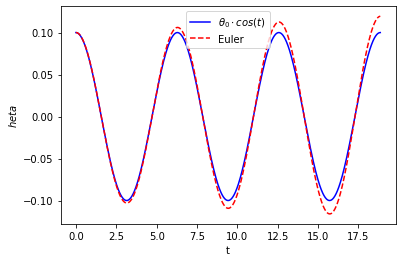

In [ ]:
import numpy as np
import matplotlib.pylab as plt
from math import pi

# the two differential equations
def pendulum_func(r, time):
    dr = np.zeros(len(r))
    dr[:] = [r[1], -r[0]]
    return dr

N = 1000
time = np.linspace(0, 6*pi, N+1)
thetha_0 = [0.1, 0]   # initial pendulum position and velocity

theta = euler(pendulum_func, thetha_0, time)
thetha = theta[:, 0]   # when we make plot, we only plot the angle, not the speed
thetha_analytic = thetha_0[0]*np.cos(time)  # analytical solution

plt.figure()
plt.plot(time, thetha_analytic, 'b')
plt.plot(time, thetha, 'r--')
plt.legend([r'$\theta_0 \cdot cos(t)$', 'Euler'], loc='best')
plt.xlabel('t')
plt.ylabel('$\theta$')
plt.show()

For a nonlinear pendulum, we have $\frac{d^2 \theta}{dt^2} + \sin \theta=0$, with $g/L=1$

If we define $\theta=r_0$ and $\frac{d\theta}{dt}=r_1$, then $\frac{dr_1}{dt}=-\sin r_0$. 

The two equations become:

$\frac{dr_0}{dt}=r_1$

$\frac{dr_1}{dt}=-\sin r_0$

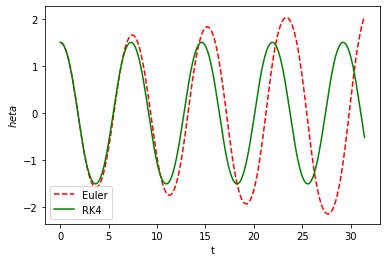

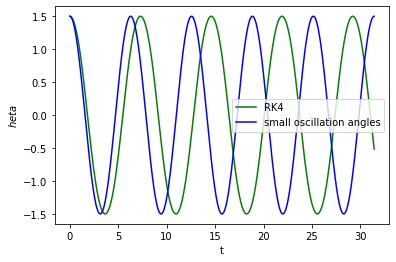

In [ ]:
import numpy as np
import matplotlib.pylab as plt
from math import pi

# the two differential equations
def pendulum_func(r, time):
    dr = np.zeros(len(r))
    dr[:] = [r[1], -np.sin(r[0])]
    return dr

N = 1000
time = np.linspace(0, 10*pi, N+1)
thetha_0 = [1.5, 0]   # initial pendulum position and velocity

theta = euler(pendulum_func, thetha_0, time)
thetha = theta[:, 0]   # when we make plot, we only plot the angle, not the speed

thetark4 = rk4(pendulum_func, thetha_0, time)
thethark4 = thetark4[:, 0]   # when we make plot, we only plot the angle, not the speed
thetha_analytic = thetha_0[0]*np.cos(time)  # analytical solution for small oscillation angles

plt.figure()
plt.plot(time, thetha, 'r--')
plt.plot(time, thethark4, 'g')
plt.legend([r'Euler', 'RK4'], loc='best')
plt.xlabel('t')
plt.ylabel('$\theta$')
plt.show()

plt.figure()
plt.plot(time, thethark4, 'g')
plt.plot(time, thetha_analytic, 'b')
plt.legend([r'RK4', "small oscillation angles"], loc='best')
plt.xlabel('t')
plt.ylabel('$\theta$')
plt.show()